# NAME: Yucan Luo USC_ID :8085970332

In [1]:
### import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

# (a)  download data and Use the first 1495 rows of data as the training set and the rest as the test set

In [2]:
crime_data = pd.read_csv('../Homework 4 Data/communities.csv', na_values='?', header=None)

In [3]:
### drop first 5 columns which is non-predictive col according to the description 
crime = crime_data.iloc[:, 5:] 

In [4]:
crime


,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [5]:

#split dataset into training data and test data
train = crime.iloc[:1495, :] # first 1495 rows as train 
test = crime.iloc[1495:, :] # rest as test 
train

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


# b) Use a data imputation technique to deal with the missing values in the data set.

In [6]:
from sklearn.impute import SimpleImputer

In [7]:

# Using median to impute missing values
imp = SimpleImputer(missing_values=np.nan,strategy="median")
imp.fit(train) ### fit the imputer onn training set 

train_data = pd.DataFrame(imp.transform(train)).round(2)
### using fitted imputer on test set as well 
test_data = pd.DataFrame(imp.transform(test)).round(2)
train_data


,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


In [61]:
#train_data.head()

# (c) Plot a correlation matrix for the features in the data set.

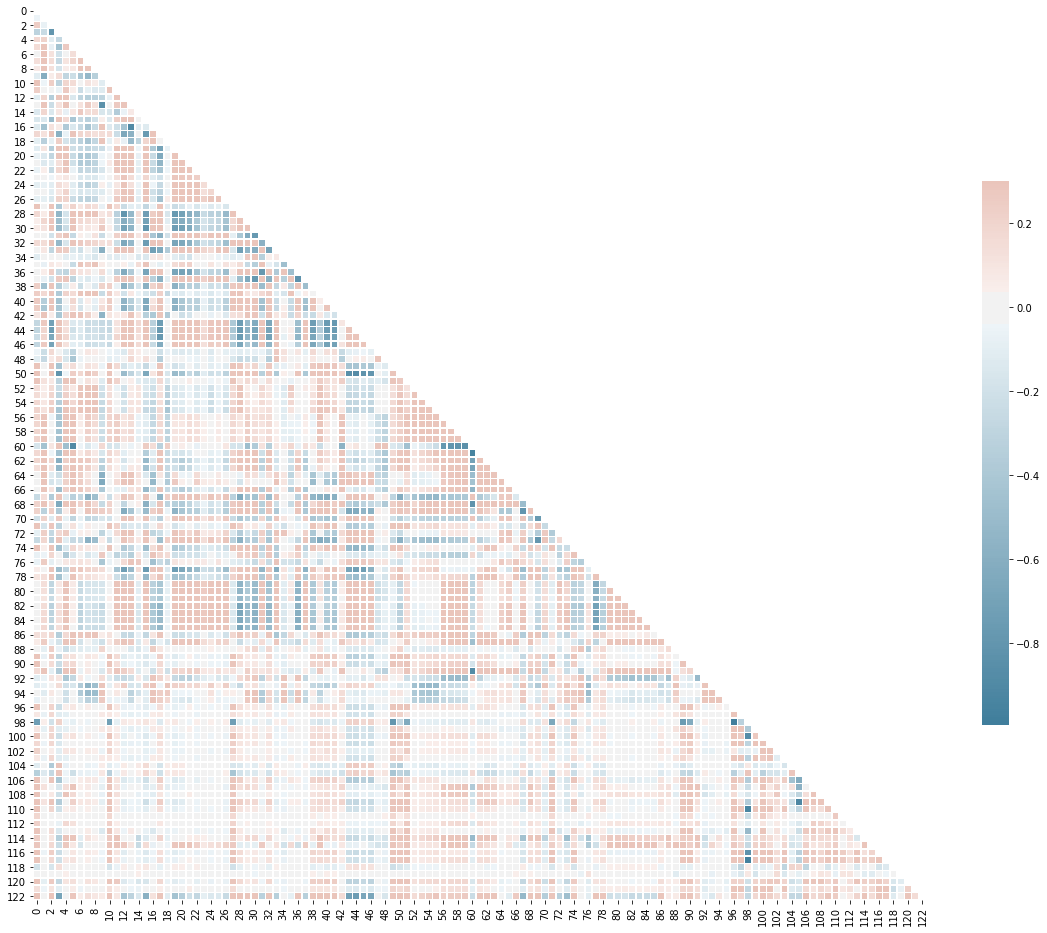

In [27]:
# Compute the correlation matrix for training data set 

corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [28]:
whole_data = pd.concat([train_data, test_data]) ### get the whole data set by combinng training and test set 


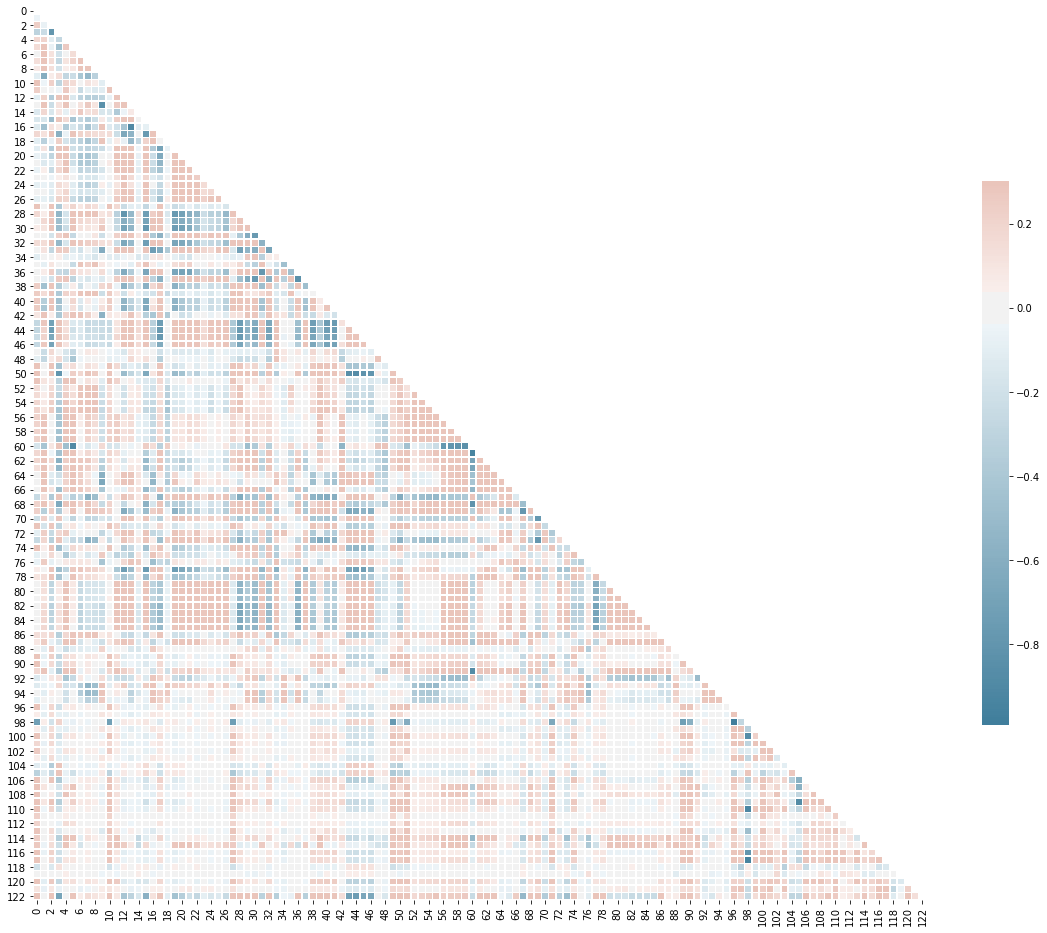

In [29]:
# Compute the correlation matrix for whole data set 

corr = whole_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean..

In [43]:
## get features_x and response_y
X_train = train_data.iloc[:, :122] ### features 
y_train = train_data.iloc[:, -1] ### last column is target value 
X_test = test_data.iloc[:, :122]
y_test = test_data.iloc[:, -1]

CV_feature = X_train.apply(lambda x: np.std(x)/np.mean(x))
print("the Coefficient of Variation CV for each feature in training set  :\n")
pd_CV=pd.DataFrame(CV_feature, columns=["train: variation "])
pd_CV

the Coefficient of Variation CV for each feature in training set  :



,train: variation
0,2.240355
1,0.355681
2,1.428407
3,0.330102
4,1.358645
...,...
117,1.644957
118,0.111995
119,0.334992
120,2.552092


In [86]:
### to calulate the variation for features based on whole data set 
X_whole = whole_data.iloc[:, :122] 
y_whole = whole_data.iloc[:,-1]

CV_feature_whole = X_whole.apply(lambda x: np.std(x)/np.mean(x))
print("the Coefficient of Variation CV for each feature in whole dataset:\n")
pd_CV_whole=pd.DataFrame(CV_feature_whole, columns=["variation"])
pd_CV_whole

the Coefficient of Variation CV for each feature in whole dataset:



,variation
0,2.202950
1,0.353210
2,1.410567
3,0.323700
4,1.358821
...,...
117,1.562508
118,0.118970
119,0.333399
120,2.554625


# (e) Pick up 128^(1/2) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [87]:
import math

pickup_number = math.floor(math.sqrt(128))

In [88]:
### sourt the variation by descending order 
#df.sort_values(by=['col1'])


rank_CV= pd_CV_whole.sort_values(by=['variation'], ascending=False)

In [89]:
rank_CV.head(pickup_number)

,variation
108,5.446469
90,4.406597
89,3.484607
49,2.993446
51,2.899770
120,2.554625
27,2.304392
0,2.202950
96,2.080190
10,2.001242


In [90]:
top_features_col = rank_CV.T.columns[:pickup_number]

In [91]:
#selected feature
whole_top11_features = whole_data.iloc[: ,top_features_col]
#whole_top11_features

scatter plots

In [92]:

### combine the selected features with output value 
features_df = pd.concat([whole_top11_features,y_whole] , axis=1)

#sns.pairplot(pd.concat([train_top11_features, y_train, axis=1]))
#plt.show()


In [93]:
features_df.head()

,108,90,89,49,51,120,27,0,96,10,71,122
0,0.1,0.0,0.04,0.04,0.03,0.32,0.08,0.19,0.03,0.20,0.21,0.20
1,0.0,0.0,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.67
2,0.0,0.0,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.43
3,0.0,0.0,0.00,0.03,0.02,0.00,0.01,0.04,0.02,0.06,0.01,0.12
4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.01,0.03


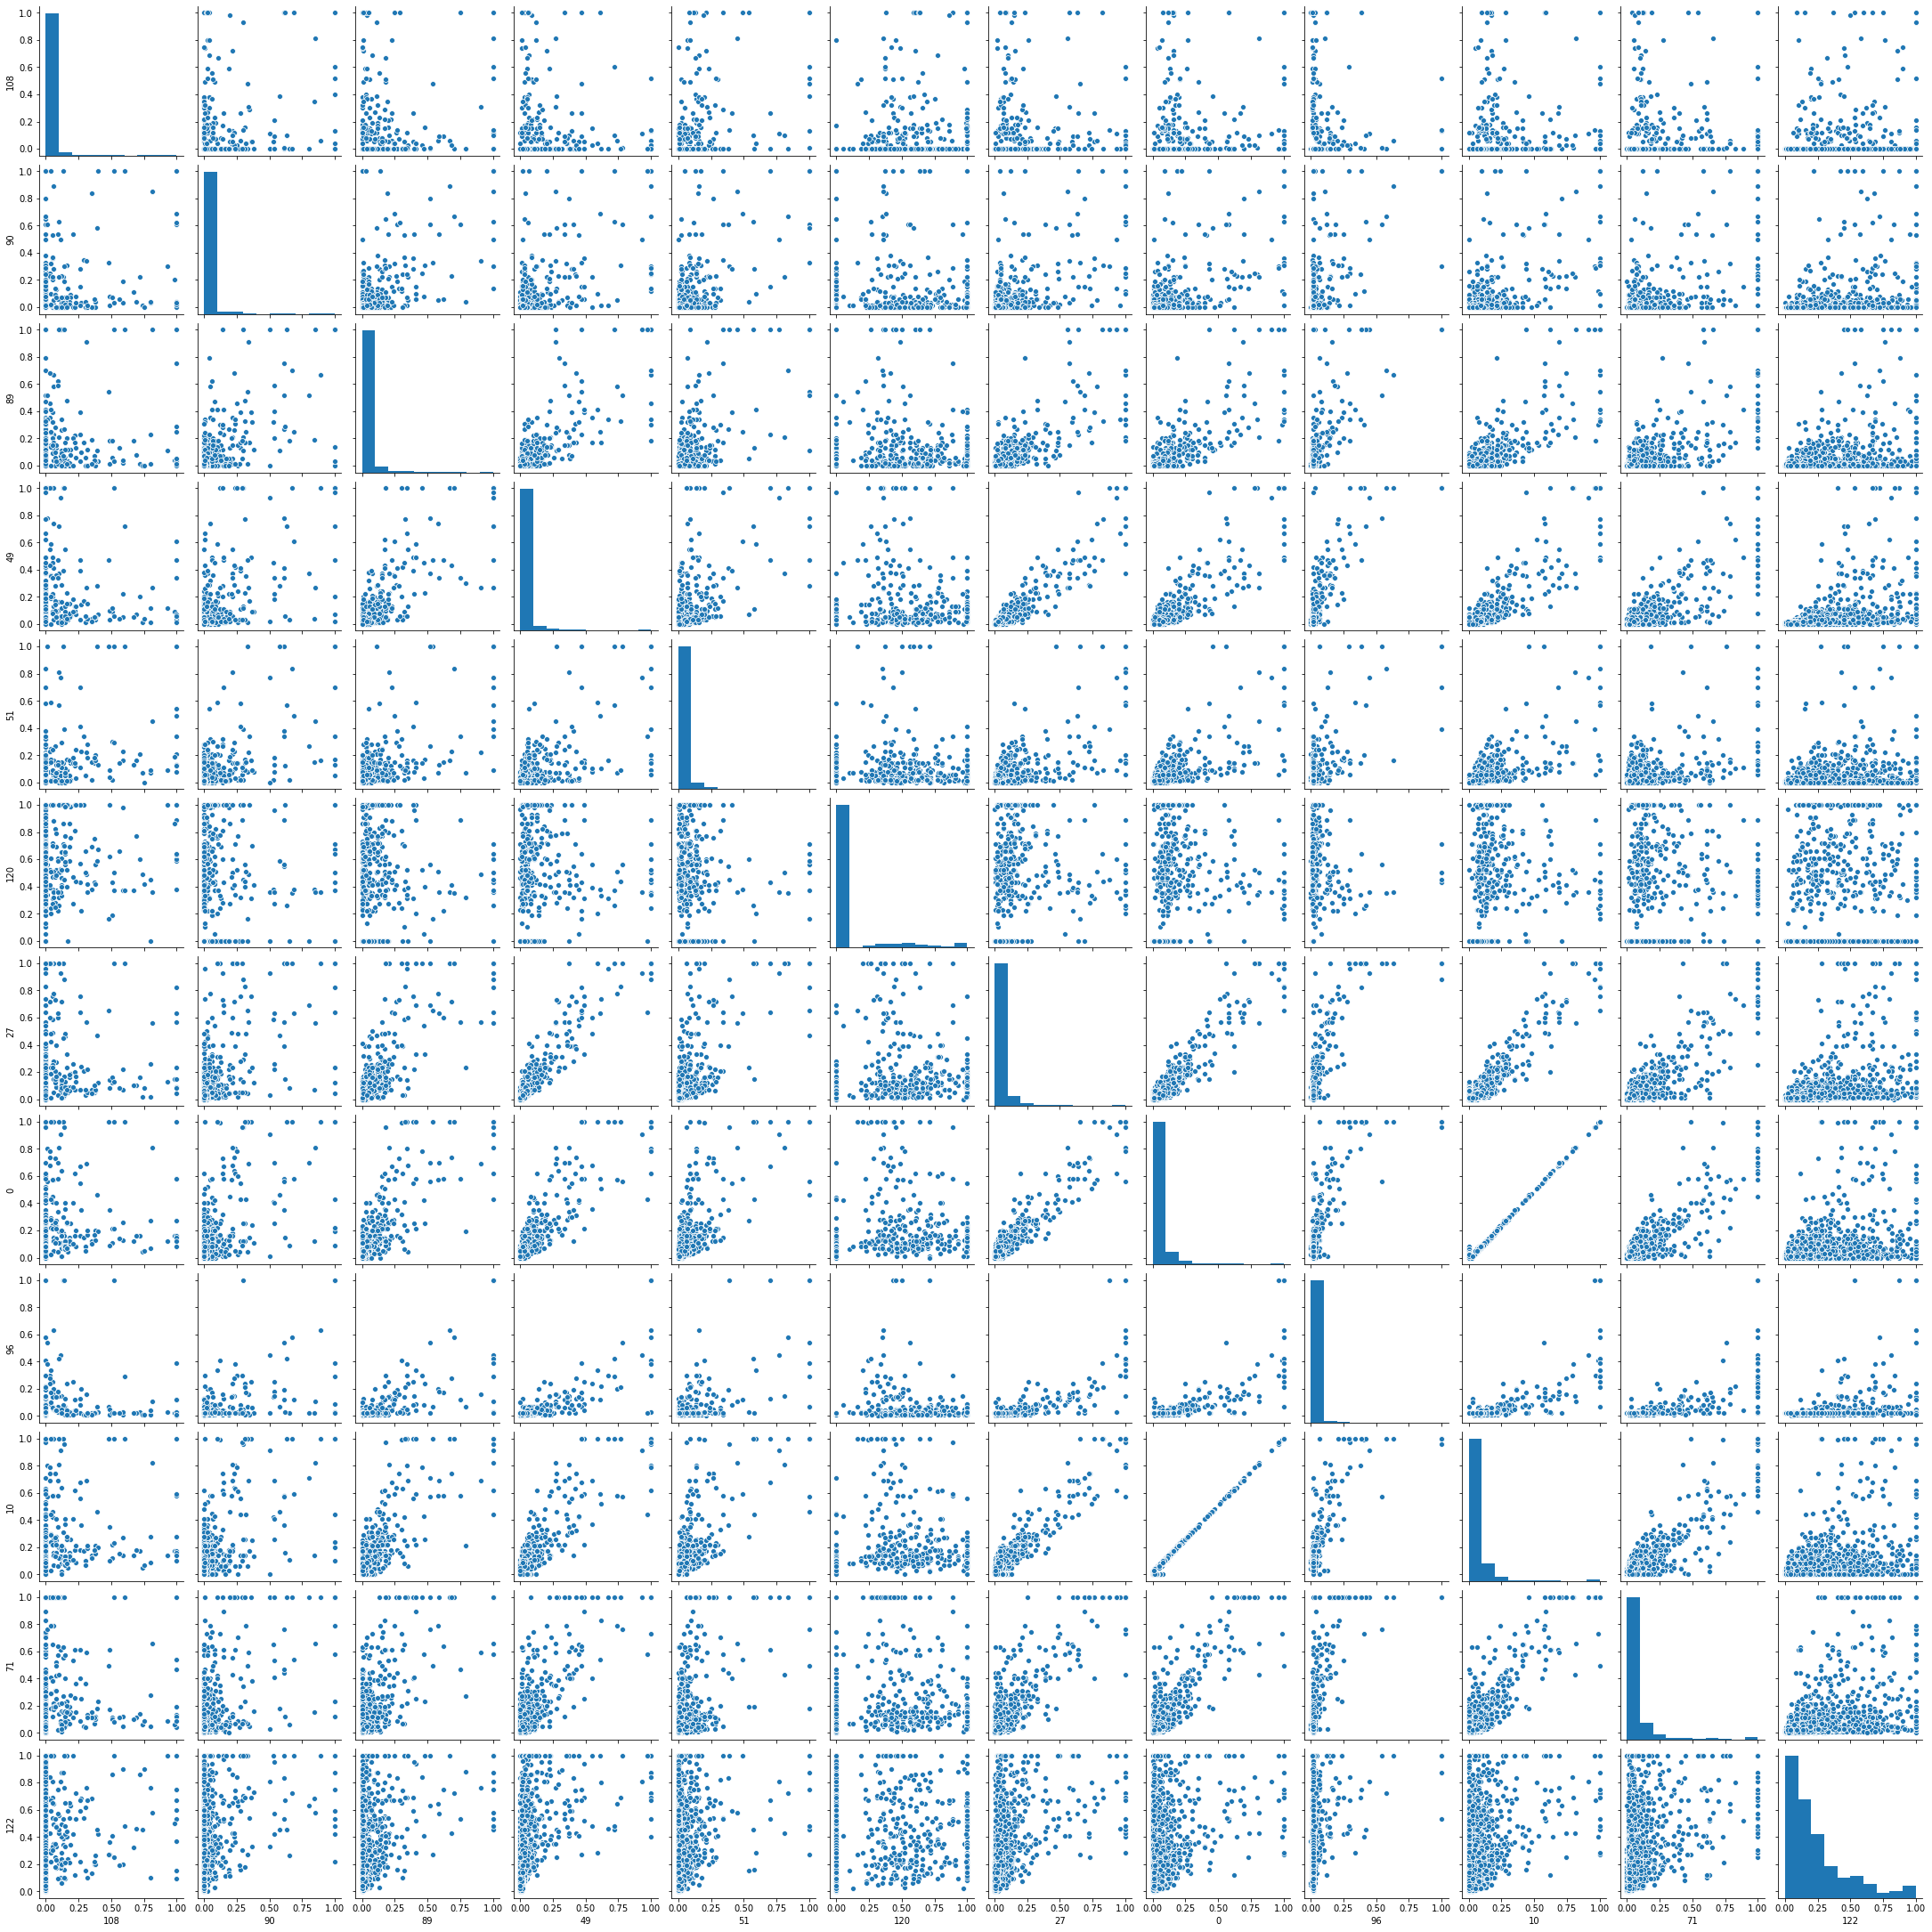

In [73]:
#scatter plot for those feautres 
#paint them in the same plot
#features_df.head()

sns.pairplot(features_df)
plt.show()

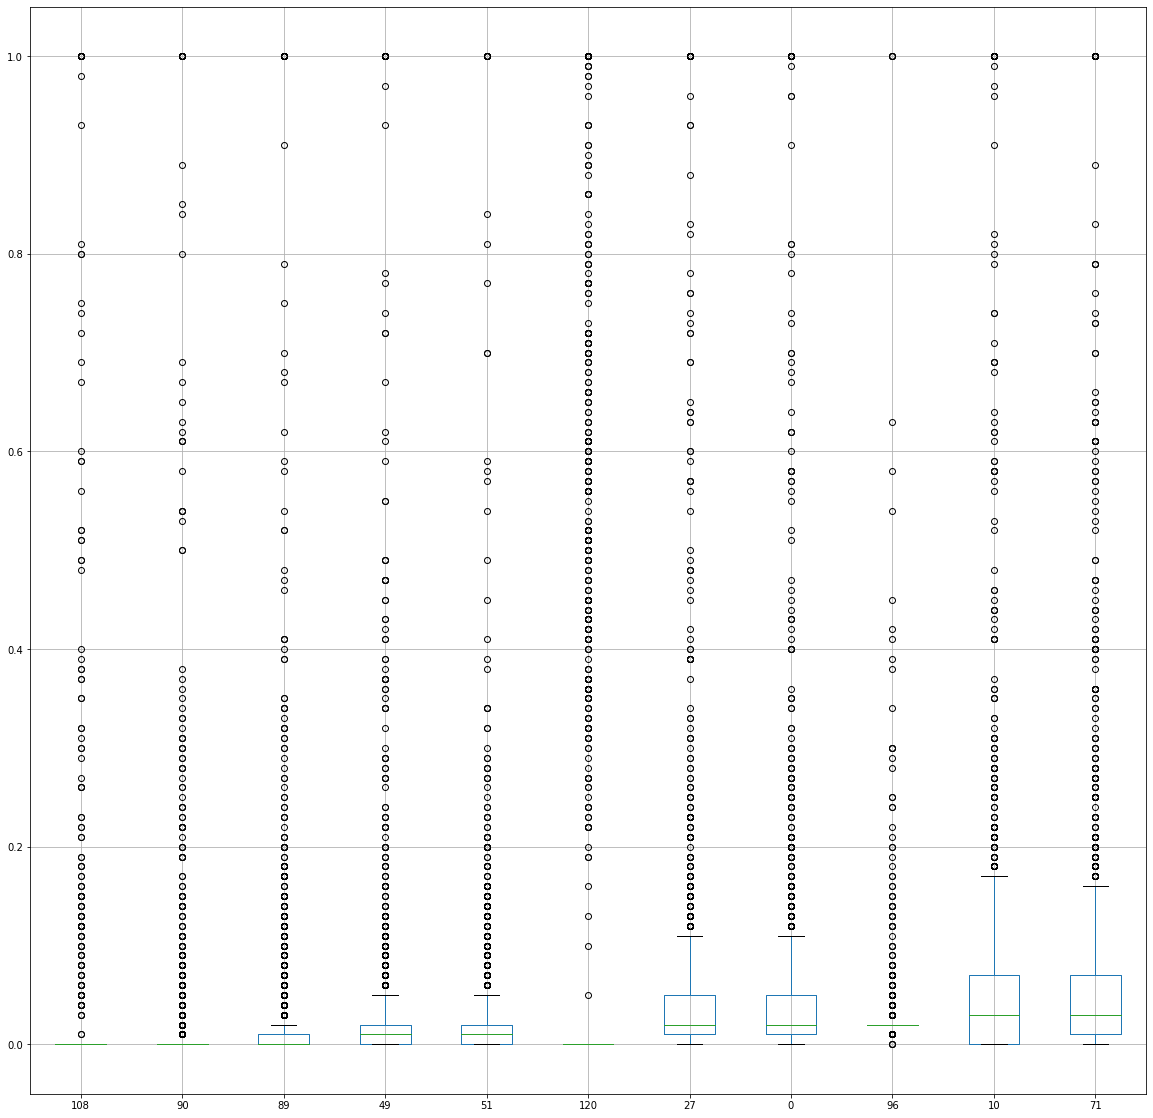

In [74]:
#boxplot
f, ax = plt.subplots(figsize=(20, 20))
boxplot = whole_top11_features.boxplot(column=list(whole_top11_features.columns))
plt.show()

we can see that from boxplot, since those varables have high varaiance, their mean would be relative small.

from scatter plot, although some features such as 27() and10() show positive relationship between them.  none of features display a clear positive or negative trend between target variable. It is hard to draw any conclusions about the significance of those features from the scatter plot. 


# (f) Fit a linear model using least squares to the training set and report the test error.

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [8]:
from statsmodels.api import OLS
import statsmodels.api as sm

In [18]:
### prepare the raw data for model 
train_x = train_data.iloc[:, :122] ### features 
train_y = train_data.iloc[:, -1] ### last column is target value 
test_x = test_data.iloc[:, :122]
test_y =  test_data.iloc[:, -1]

In [22]:

### mutiliple linear regression model 

linear_model = sm.OLS(train_y, train_x).fit() 
predict_y = linear_model.predict(test_x)
mse = MSE(test_y,predict_y)

# Print out the statistics
#print(linear_model.summary())


In [23]:
print("the test error for linear model is : ",mse)

the test error for linear model is :  0.0180458057822279


# g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [24]:
from sklearn.linear_model import RidgeCV
#initial λ which want to test
### since the data is already normalize we set normalize to false
l = np.logspace(-1,1,50)
ridge_model = RidgeCV(alphas=l, cv=5, normalize= False).fit(train_x, train_y) 
r_square = ridge_model.score(test_x,test_y)
predict_y =ridge_model.predict(test_x)
mse = MSE(test_y,predict_y)

print("Best λ: ", ridge_model.alpha_)
print("R suqare : ", round(r_square,5))
print("test error : ", round(mse,5))

Best λ:  2.442053094548651
R suqare :  0.63181
test error :  0.01751


Ridge regression : The chosen alpha with a 5-fold cross-validation is 2.44, which gives a test error of 0.0175. 

# (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. 

In [51]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [54]:
### initial the alphas 
l = np.logspace(-4,1,10)
lasso_model = LassoCV(alphas=l, cv=5, random_state=0, normalize=False).fit(train_x, train_y)
### test on test set 
r_square = lasso_model.score(test_x,test_y)
predict_y =lasso_model.predict(test_x)
mse = MSE(test_y,predict_y)


In [55]:
print("Best λ   : ", lasso_model.alpha_)
print("R suqare : ", round(r_square,3))
print("test error : ", round(mse,5))

Best λ   :  0.0001
R suqare :  0.629
test error :  0.01764


Lasso regression : The chosen alpha with a 5-fold cross-validation is 0.0001, which gives a test error of 0.0176. 

In [58]:
# Selected variables by Lasso with non-standardized features

select_variables = train_x.columns[np.where(lasso_model.coef_!=0)]

In [59]:
print("the selected variable is :{}".format(select_variables))

the selected variable is :Int64Index([  2,   4,   6,   7,   9,  11,  13,  14,  15,  16,  17,  18,  21,
             22,  23,  24,  25,  26,  28,  29,  31,  33,  34,  36,  38,  39,
             40,  44,  45,  46,  48,  49,  50,  51,  55,  59,  61,  63,  64,
             67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  82,
             85,  86,  87,  88,  89,  90,  91,  94,  99, 100, 102, 104, 106,
            107, 108, 111, 112, 113, 114, 115, 116, 118, 119],
           dtype='int64')


# Repeat with standardized features. Report the test error for both cases and compare them.

In [60]:
#standardized features
std = StandardScaler()
X_train_std = std.fit_transform(train_x)
X_test_std = std.fit_transform(test_x)
### initial the alphas 
l = np.logspace(-4,1,10)
lasso_model_std = LassoCV(alphas=l, cv=5, random_state=0, normalize=False).fit(X_train_std, train_y)
###Test on test data
r_square = lasso_model_std.score(X_test_std,test_y)
predict_y =lasso_model_std.predict(X_test_std)
mse = MSE(test_y,predict_y)


In [62]:

print("Best λ   : ", lasso_model_std.alpha_)
print("R suqare : ", round(r_square,3))
print("test error (standarandized features): ", round(mse,5))

Best λ   :  0.001291549665014884
R suqare :  0.626
test error (standarandized features):  0.0178


for standardized features of lasso : the chosen alpha is 0.00129, which gives a test error of 0.0178, which is almost the same as the previous Lasso with non-standardized features.

Therefore, there's no much difference between standardized and non-standardized features of lasso. this might because the data has already been normalized before. 

In [64]:
# Selected variables by Lasso with standardized features

select_variables_std = train_x.columns[np.where(lasso_model_std.coef_!=0)]

print("the selected variable is :{}".format(select_variables_std))

the selected variable is :Int64Index([  2,   7,  11,  13,  14,  15,  16,  17,  18,  22,  23,  24,  25,
             26,  28,  33,  38,  39,  44,  45,  48,  49,  50,  51,  53,  59,
             67,  68,  69,  71,  72,  74,  75,  76,  78,  82,  85,  86,  88,
             89,  90,  91,  94,  99, 100, 102, 104, 106, 107, 108, 110, 111,
            112, 113, 114, 115, 116, 118, 119],
           dtype='int64')


The features selected by both non-standardized and standardized are the almost the same.

# (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

In [33]:
# Define a pipeline to search for the best combination of PCA truncation

pca = PCA()
# set the pipi which we like to tuning 
linearR = LinearRegression()
pipe = Pipeline(steps=[('pca', pca), ('linreg', linearR)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [*range(1,123)],  ### choosen from all possible combination 
}

## fit on training set 
search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
search.fit(train_x, train_y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [37]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print("the best combination M: ",search.best_params_)

y_pred = search.predict(test_x)
print('MSE on test set: %s' % (round(MSE(test_y, y_pred), 5)))

Best parameter (CV score=0.657):
the best combination M:  {'pca__n_components': 96}
MSE on test set: 0.01834


The best number of principal components is found to be 96 with corresponding score of 0.657
The test error is 0.01834. 


# (j) In this section, we would like to fit a boosting tree to the data one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [40]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [42]:
X_train = train_data.iloc[:, :122] ### features 
y_train = train_data.iloc[:, -1] ### last column is target value 
X_test = test_data.iloc[:, :122]
y_test = test_data.iloc[:, -1]


In [58]:
# Set up DMatrix which is supported by xgboost 
dmatrix_train = xgb.DMatrix(data=train_x, label=train_y) 
#dmatrix_test = xgb.DMatrix(data=test_x, label=test_y)

### set dict space for hyperparameter tuning I choose to tuning 
space={'max_depth': hp.quniform("max_depth", 3, 8, 1),
        'reg_alpha' : hp.uniform('reg_alpha', 0,1), ### set the alpha range 
    }

In [59]:

def objective(space):
    
    
    params = {"objective":"reg:squarederror",
              'colsample_bytree': 0.3,
              'learning_rate': 0.1,
               'max_depth': int(space["max_depth"]), 
               'alpha': int(space["reg_alpha"]),
                }
    clf=xgb.cv(dtrain=dmatrix_train,params = params,nfold = 5,\
                                 metrics="rmse", verbose_eval=False,
                                 num_boost_round=1000,early_stopping_rounds=50)
    
    

  
    return np.min(clf['test-rmse-mean']) 



trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

100%|██████████| 100/100 [02:53<00:00,  1.74s/trial, best loss: 0.13858920000000002]
The best hyperparameters are :  

{'max_depth': 4.0, 'reg_alpha': 0.26232910767753903}


therefore, from the training set, we get the best max_depth is 4.0 and the best alpha is 0.2632 

In [62]:
### refit the best model and test on test set 

xgb_reg = xgb.XGBRegressor(max_depth=4,
                           alpha=0.26232910767753903,\
                           n_estimators = 1000, objective='reg:squarederror')
xgb_reg.fit(train_x, train_y)

xgb_pred = xgb_reg.predict(test_x)
xgb_r2 = xgb_reg.score(test_x,test_y)
xgb_mse = MSE(test_y, xgb_pred)

#1 - xgbreg.score(X_test, y_test)


In [63]:

print(" R square :",round(xgb_r2, 3))
print(" test error on test set :", round(xgb_mse, 5))

 R square : 0.632
 test error on test set : 0.01751


We got at a test error of 0.01751 with the optimized hyperparameters (alpha = 0.262329, max_depth = 4) 



# 2. Tree-Based Methods

a)  load the data 

In [2]:
#read dataset
#usecol=range(171)
train_data = pd.read_csv("../Homework 4 Data/aps_failure_training_set.csv", na_values='na', skiprows=20)
test_data = pd.read_csv("../Homework 4 Data/aps_failure_test_set.csv",na_values='na',skiprows=20)

In [72]:
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# (b) Data Preparation

i. Research what types of techniques are usually used for dealing with data with
missing values.

1. delete the missing value 
2. imupation (replacing the missing value with mean, median or mode)
3. treat the missing value as target value and try to predict them 
4. using algorithms that support missing values 


In [14]:
### prepare the raw data 
X_train = train_data.iloc[:, 1:] ### except the first column, rest is predictors 
y_train = train_data.iloc[:, 0] ### first column is the target value 
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

In [15]:
### I decide to choose the imupation and replacing the missing value with mean 

from sklearn.impute import SimpleImputer
# Using mean to impute missing values
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp.fit(X_train)  ### fit the imputer on training data 
#transform the X_train
X_train = pd.DataFrame(imp.transform(X_train))

### will use fitted imuputer in training set to transform the test data
X_test = pd.DataFrame(imp.transform(X_test))

In [75]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [131]:
from sklearn.preprocessing import Normalizer
## first we need to normalize the features since the scale of features are extremely different 
Norm = Normalizer() 

X_train_norm = Norm.fit_transform(X_train)

### convert the X_train_norm back to dataframe so that we can use apply attribute 
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)

CV_feature = X_train_norm.apply(lambda x: np.std(x)/np.mean(x))
print("the Coefficient of Variation CV for each feature in training set:")
pd_CV=pd.DataFrame(CV_feature, columns=["variation"])
pd_CV

the Coefficient of Variation CV for each feature in training set:


,variation
0,1.809763
1,2.904017
2,1.926711
3,2.796677
4,12.659079
...,...
165,1.886270
166,2.061377
167,4.181671
168,69.079581


# iii. Plot a correlation matrix for your features using pandas or any other tool.


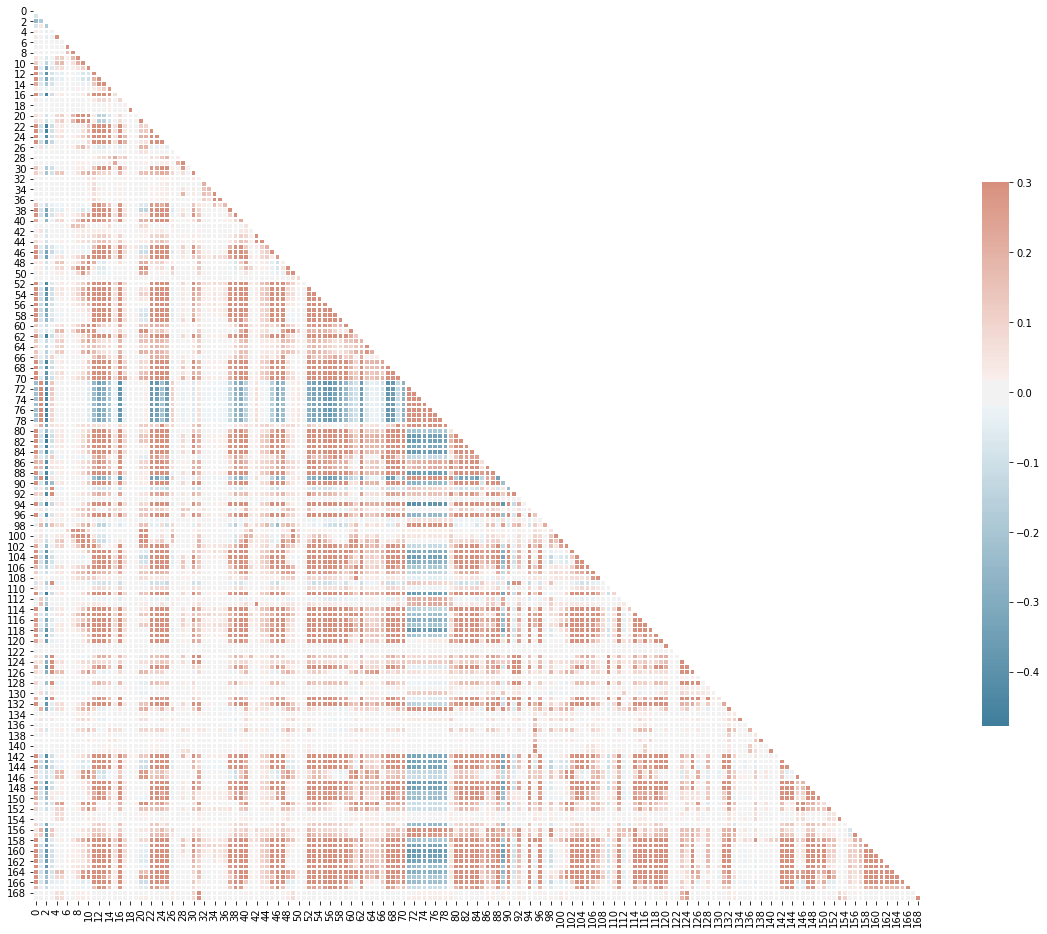

In [79]:
# Compute the correlation matrix for training data set 

corr = X_train_norm.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them

In [81]:
import math

pickup_number = math.floor(math.sqrt(170))

rank_CV= pd_CV.sort_values(by=['variation'], ascending=False)

rank_CV.head(pickup_number)

,variation
122,124.519958
138,111.590077
93,90.915622
6,76.119597
19,72.233389
168,69.079581
29,67.484675
27,66.451367
51,60.065777
136,55.082840


In [82]:
top_features_col = rank_CV.T.columns[:pickup_number]

#selected feature
selected_features = X_train_norm.iloc[: ,top_features_col]
#whole_top11_features

In [84]:
selected_features.head()

,122,138,93,6,19,168,29,27,51,136,153,134,169
0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,3.437888e-11,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000e+00,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000018
4,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


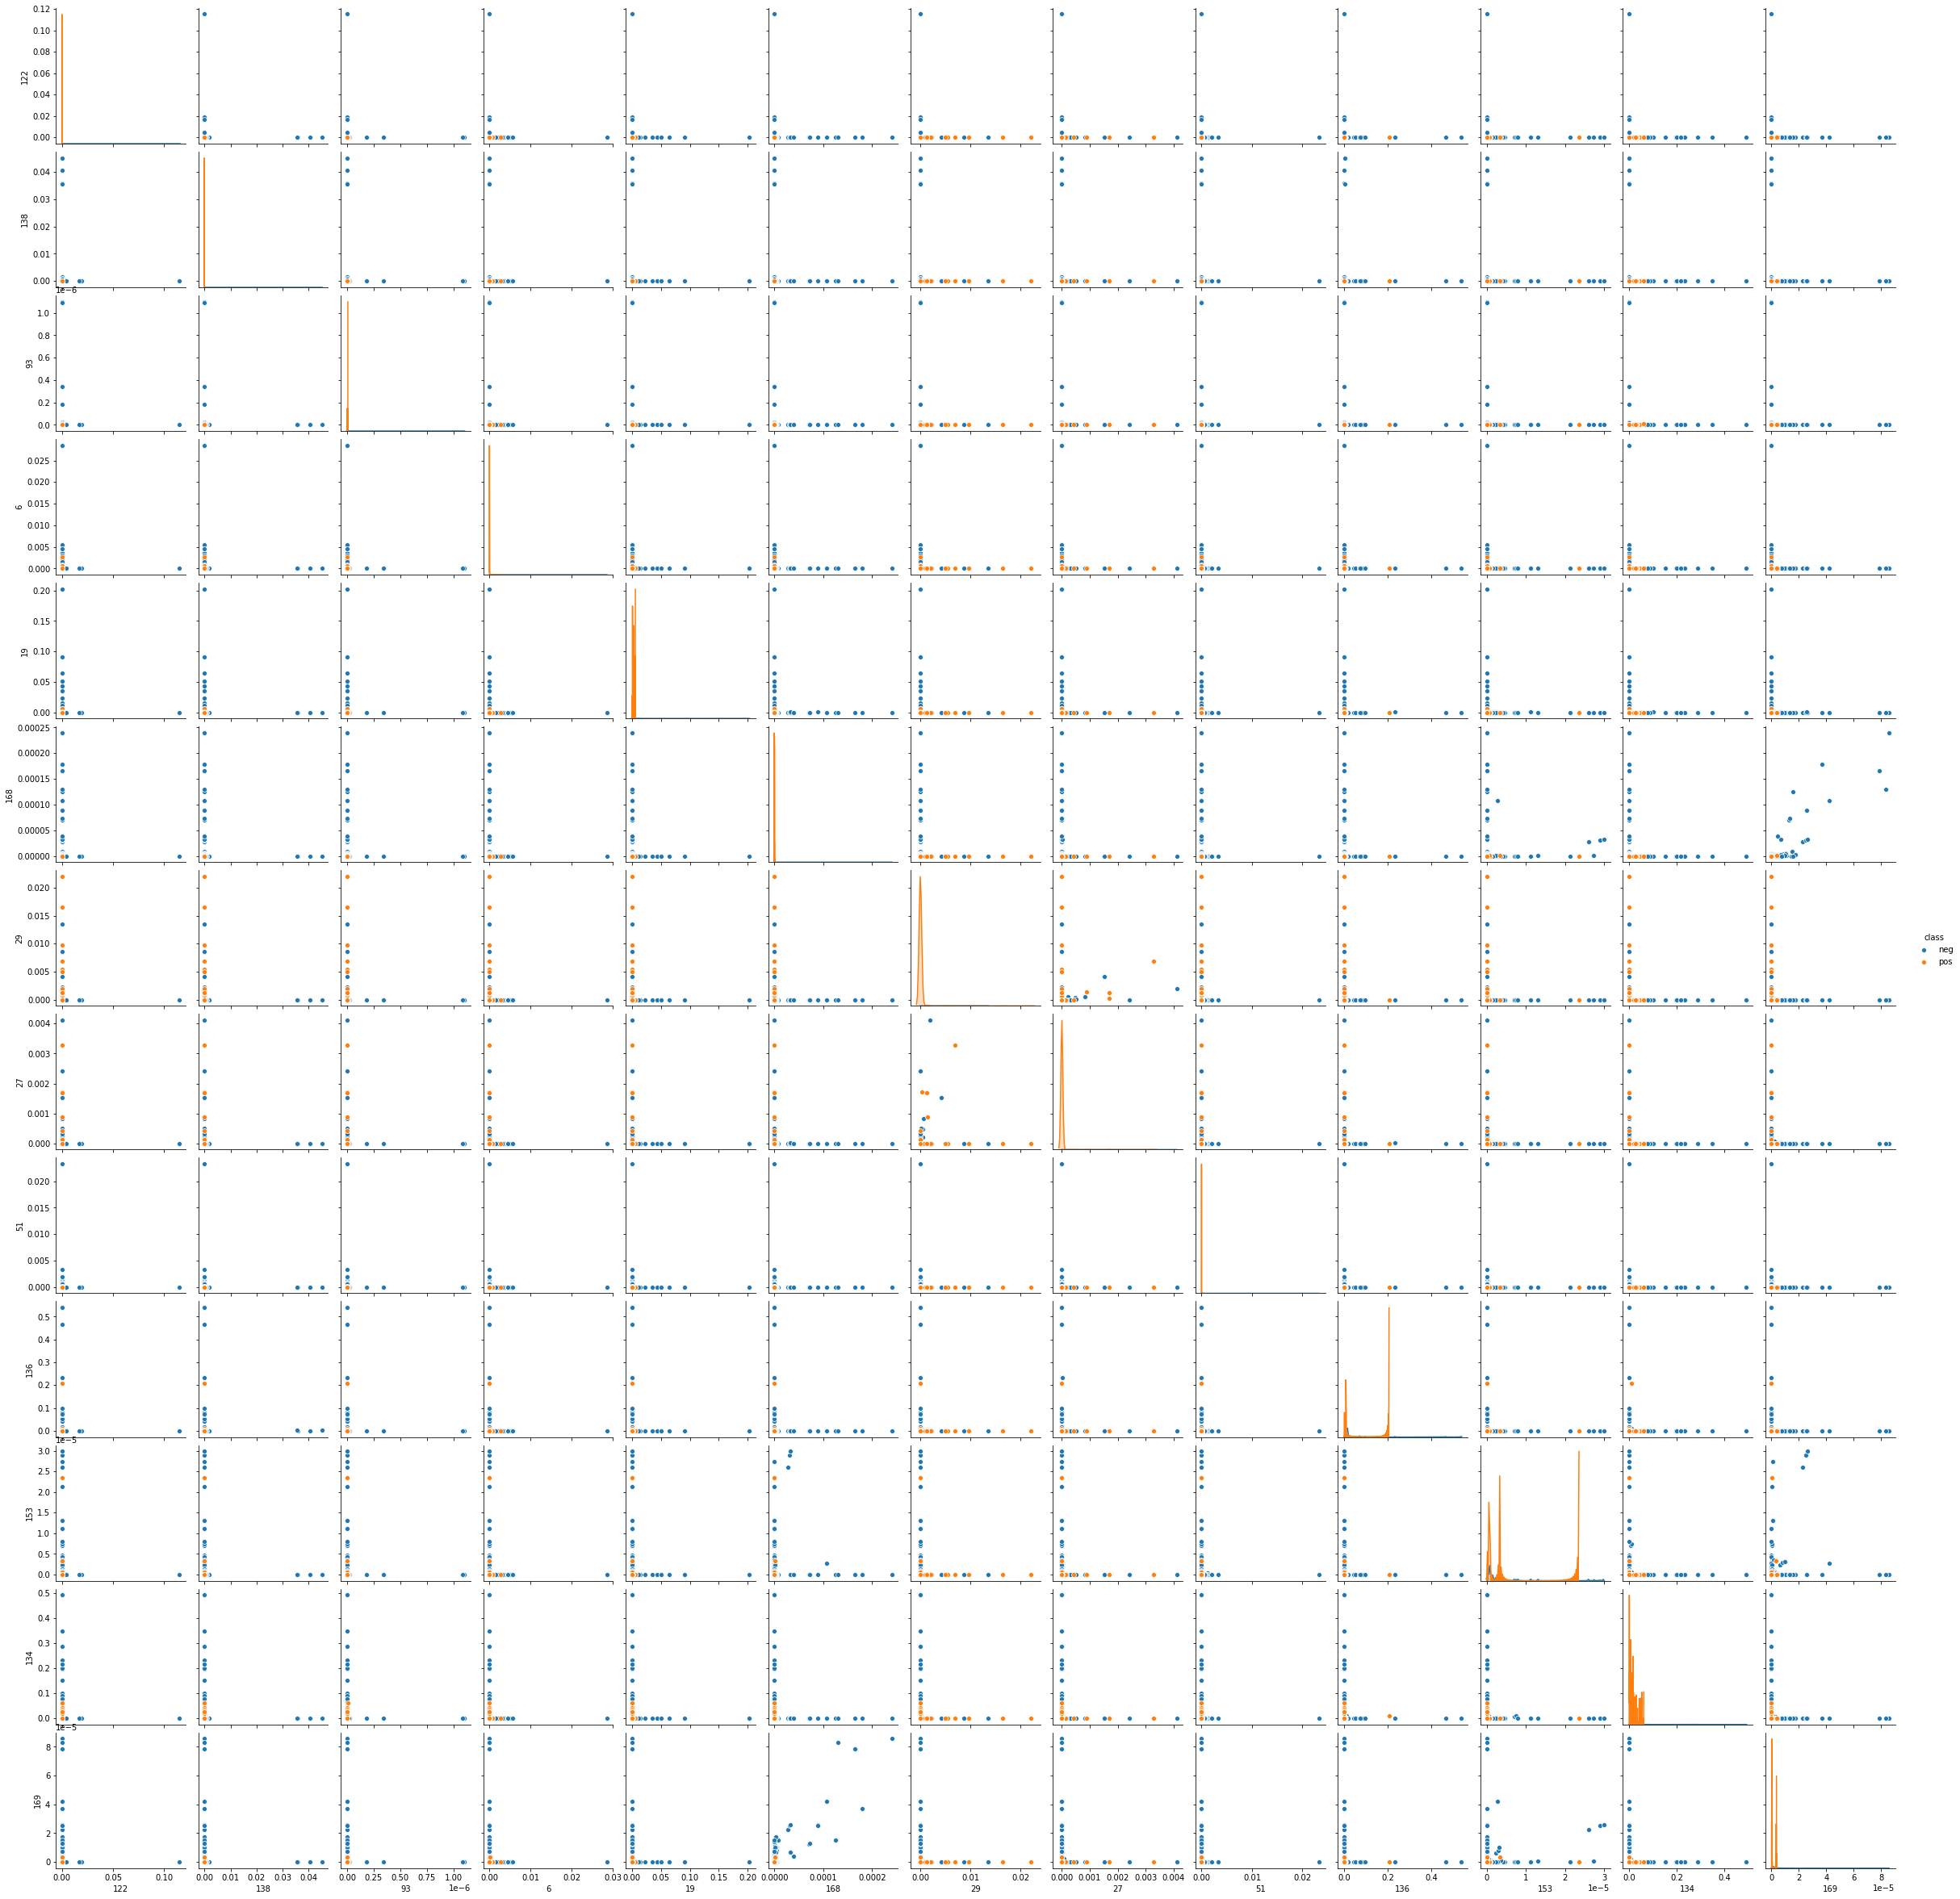

In [85]:
### to plot the scatter plot in one pic

sns.pairplot(pd.concat([selected_features, y_train], axis=1), hue='class')
#sns.pairplot(selected_features, )
plt.show()

In [117]:
print(list(top_features_col))

[122, 138, 93, 6, 19, 168, 29, 27, 51, 136, 153, 134, 169]


In [91]:
df = pd.concat([selected_features, y_train], axis=1)

In [116]:
#df

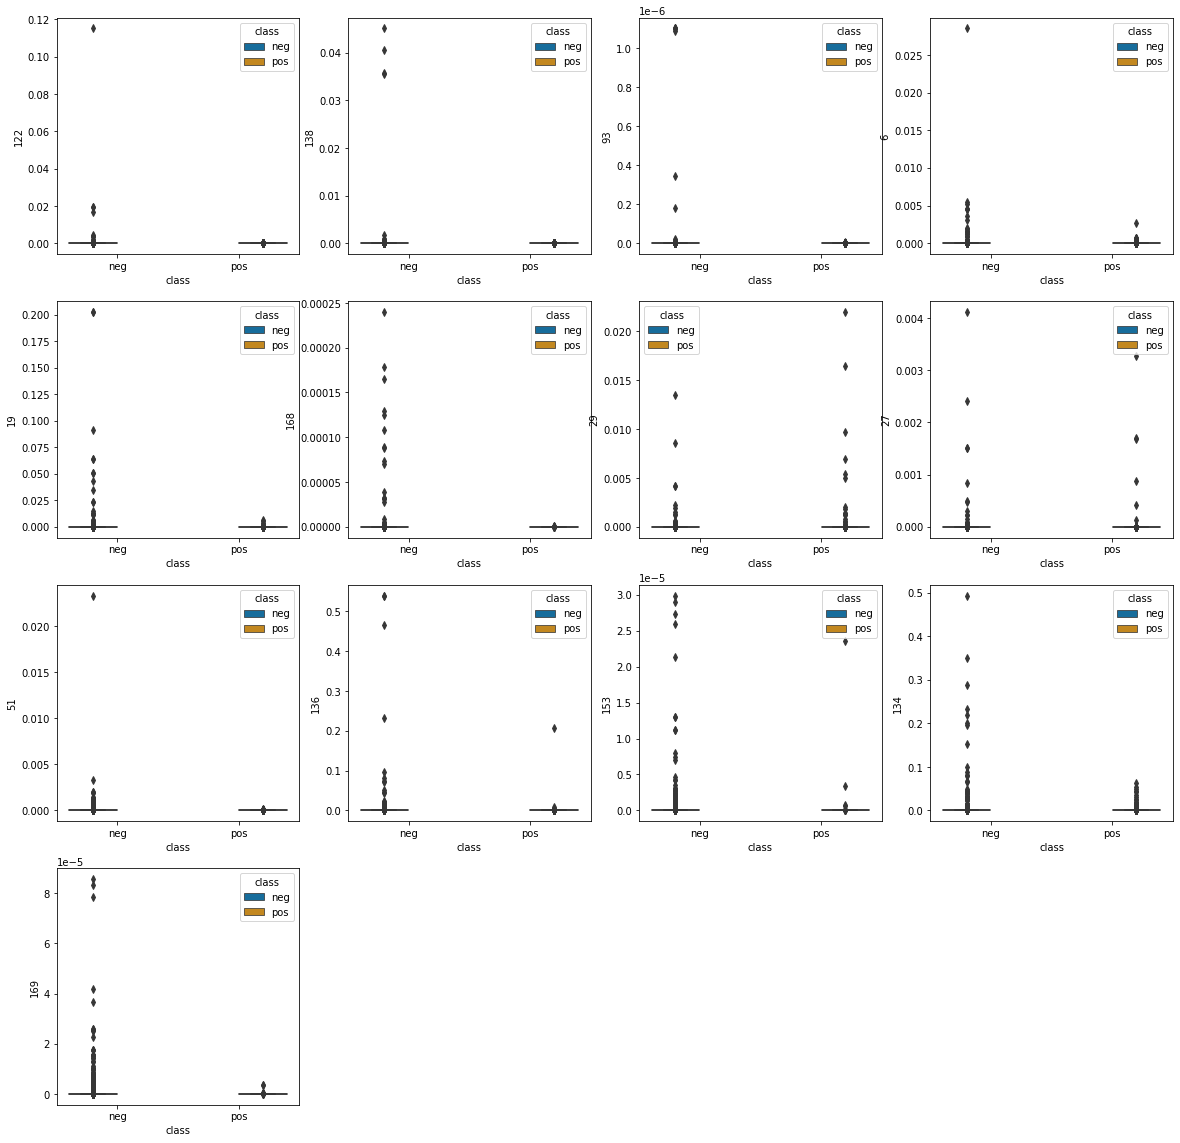

In [115]:
q= 1
plt.figure(figsize=(20, 20))
for i in list(top_features_col):
    fig = plt.subplot(4,4,q)
    
    sns.boxplot(y=selected_features[i], x='class', 
                 data=df, 
                 palette="colorblind",
                 hue='class')
    q +=1

    
plt.show()
    

Based on  the plot of the train dataset, it's hard for me to draw any conclusion about the signifiance of those features. 

# v. Determine the number of positive and negative data. Is this data set imbal- anced?

In [118]:
y_train.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [119]:
y_test.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

The positive samples are less than 5%, there is a highly imbalance

# (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [132]:
### transform the outcome into 1 or 0 

y_train = y_train.apply(lambda x: 0 if x=='neg' else 1)
y_test = y_test.apply(lambda x: 0 if x=='neg' else 1)


In [133]:
### build random forest model

clf = RandomForestClassifier(n_estimators=1000, max_depth=4,oob_score=True)
clf.fit(X_train_norm, y_train)
train_y_pred = clf.predict(X_train_norm)
#.predict_proba* estimates probabilities for negative and positive
train_y_pred_prob = clf.predict_proba(X_train_norm)[:,1]
test_y_pred = clf.predict(X_test)
test_y_pred_prob = clf.predict_proba(X_test)[:,1]

In [134]:
print("the confusion metrix table for training set :")
tn, fp, fn, tp = confusion_matrix(y_train,train_y_pred).ravel()

print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 

confusion_metrix_table = pd.DataFrame(confusion_matrix(y_train, train_y_pred), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

the confusion metrix table for training set :
True Positives: 231
False Positives: 8
True Negatives: 58992
False Negatives: 769
              prdicted false  Predicted true
Actual false           58992               8
Actual true              769             231


ROC FOR TRAINING


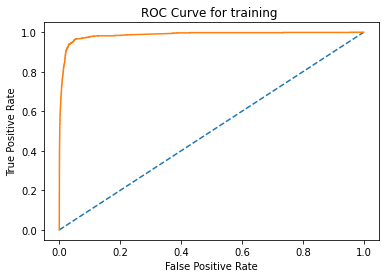

AUC score is: 0.9864685423728814
Misclassification rate is: 0.013
F1 score is: 0.373


In [136]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
from sklearn.metrics import roc_auc_score

print("ROC FOR TRAINING")
fpr, tpr, thresholds = roc_curve(y_train, train_y_pred_prob)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training ')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_train, train_y_pred_prob)
print("AUC score is:", auc_score)

#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(X_train_norm, y_train),3))
#F1-score of training data
print("F1 score is:", round(f1_score(y_train, train_y_pred),3))

In [137]:
print("the confusion metrix table for test set ")
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 
print("the confusion metrix table for test set :")
confusion_metrix_table = pd.DataFrame(confusion_matrix(y_test, test_y_pred), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

the confusion metrix table for test set 
True Positives: 3
False Positives: 0
True Negatives: 15625
False Negatives: 372
the confusion metrix table for test set :
              prdicted false  Predicted true
Actual false           15625               0
Actual true              372               3


ROC FOR Test


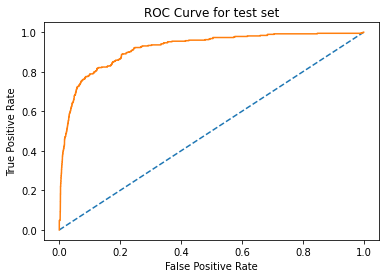

AUC score is: 0.91930624
Misclassification rate is: 0.023
F1 score is: 0.016


In [138]:
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
#from sklearn.metrics import roc_auc_score

print("ROC FOR Test")
fpr, tpr, thresholds = roc_curve(y_test, test_y_pred_prob)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_test, test_y_pred_prob)
print("AUC score is:", auc_score)

#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(X_test, y_test),3))
#F1-score of training data
print("F1 score is:", round(f1_score(y_test, test_y_pred),3))

In [139]:
#Calculate Out of Bag error estimate for your random forset and compare it to the test error.
OOB_score= clf.oob_score_
print("Out of bag error is: ",round(1-OOB_score,3))
print("test error rate is : ", round(1 - clf.score(X_test, y_test),3))

Out of bag error is:  0.013
test error rate is :  0.023


the OOB error is 0.013 and the test error is 0.023.
so, we can directly see that out of bag error is smaller than test error rate, but there's no significant difference between OOB error and test error.

# (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [2]:
from imblearn.over_sampling import SMOTE

In [145]:
### revise the imblanced data using smote
    # transform the dataset to avoid imblance data 
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

### then build the random forest model 

### build random forest model

clf = RandomForestClassifier(n_estimators=1000, max_depth=4,oob_score=True)
clf.fit(X_train_smote, y_train_smote)
train_y_pred = clf.predict(X_train_smote)
#.predict_proba* estimates probabilities for negative and positive
train_y_pred_prob = clf.predict_proba(X_train_smote)[:,1]
test_y_pred = clf.predict(X_test)
test_y_pred_prob = clf.predict_proba(X_test)[:,1]

In [146]:
print("the confusion metrix table after smote for training set :")
tn, fp, fn, tp = confusion_matrix(y_train_smote,train_y_pred).ravel()

print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 

confusion_metrix_table = pd.DataFrame(confusion_matrix(y_train_smote, train_y_pred), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

the confusion metrix table after smote for training set :
True Positives: 57696
False Positives: 4762
True Negatives: 54238
False Negatives: 1304
              prdicted false  Predicted true
Actual false           54238            4762
Actual true             1304           57696


ROC FOR after smote TRAINING


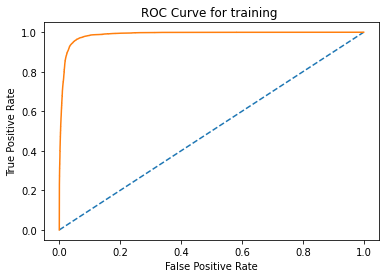

AUC score is: 0.9877636222349899
Misclassification rate is: 0.051
F1 score is: 0.95


In [148]:
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
from sklearn.metrics import roc_auc_score

print("ROC FOR after smote TRAINING")
fpr, tpr, thresholds = roc_curve(y_train_smote, train_y_pred_prob)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training ')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_train_smote, train_y_pred_prob)
print("AUC score is:", auc_score)

#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(X_train_smote, y_train_smote),3))
#F1-score of training data
print("F1 score is:", round(f1_score(y_train_smote, train_y_pred),3))

In [149]:
print("the confusion metrix table for test set ")
tn, fp, fn, tp = confusion_matrix(y_test,test_y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 
print("the confusion metrix table for test set :")
confusion_metrix_table = pd.DataFrame(confusion_matrix(y_test, test_y_pred), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

the confusion metrix table for test set 
True Positives: 1
False Positives: 5
True Negatives: 15620
False Negatives: 374
the confusion metrix table for test set :
              prdicted false  Predicted true
Actual false           15620               5
Actual true              374               1


ROC FOR Test


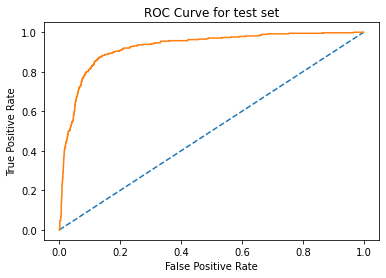

AUC score is: 0.923660032
Misclassification rate is: 0.024
F1 score is: 0.005


In [150]:
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
#from sklearn.metrics import roc_auc_score

print("ROC FOR Test")
fpr, tpr, thresholds = roc_curve(y_test, test_y_pred_prob)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_test, test_y_pred_prob)
print("AUC score is:", auc_score)

#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(X_test, y_test),3))
#F1-score of training data
print("F1 score is:", round(f1_score(y_test, test_y_pred),3))

In [151]:
#Calculate Out of Bag error estimate for your random forset and compare it to the test error.
OOB_score= clf.oob_score_
print("Out of bag error is: ",round(1-OOB_score,3))
print("test error rate is : ", round(1 - clf.score(X_test, y_test),3))

Out of bag error is:  0.052
test error rate is :  0.024


 After doing SMOTE for training data, we can see that F1-score of training data significantly increased from 0.373 to 0.95. so, we know that imbalanced data can have serious impact on F1 score. 
 however, the test OOB error increase from 0.013 to 0.052 after smote, which is due to the imbalance of test set.
 in general, we can see that eliminate the imbalanced in the data set can have postive influence. 

# (e) Model Trees

In [1]:
### import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
import weka.core.converters as converters

In [3]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/cassieluo/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/cassieluo/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/Users/cassieluo/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/Users/cassieluo/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/cassieluo/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [4]:
### prepare the raw data again to aviod discrepency 
from sklearn.impute import SimpleImputer
X_train = train_data.iloc[:, 1:] ### except the first column, rest is predictors 
y_train = train_data.iloc[:, 0] ### first column is the target value 
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

# Using mean to impute missing values
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp.fit(X_train)  ### fit the imputer on training data 
#transform the X_train
X_train = pd.DataFrame(imp.transform(X_train))

### use fitted imuputer in training set to transform the test data
X_test = pd.DataFrame(imp.transform(X_test))

In [16]:
### concatenate X, Y and write it into csv file 
#write data into csv so that we can load later
readable_train_data = pd.concat([X_train, y_train], axis = 1)
readable_test_data = pd.concat([X_test, y_test], axis = 1)
readable_train_data.to_csv("train_data.csv", index=False)
readable_test_data.to_csv("test_data.csv", index=False)

In [17]:
# convert dataset into the data that can be read by weka method
weka_test_data = converters.load_any_file("test_data.csv")
weka_test_data.class_is_last() #### set class attribute
weka_train_data = converters.load_any_file("train_data.csv")
weka_train_data.class_is_last()


In [63]:
## I chhose to use cv=5 to for model
from weka.classifiers import Evaluation
from weka.core.classes import Random
cls = Classifier(classname="weka.classifiers.trees.LMT",options=["-B"])
evl = Evaluation(weka_train_data)
evl.crossvalidate_model(cls, weka_train_data, 5, Random(1))

In [89]:
#result 
print("=== Summary of Cross-Validation ===")
print(evl.summary())
print(evl.class_details())


=== Summary of Cross-Validation ===

Correctly Classified Instances       59386               98.9767 %
Incorrectly Classified Instances       614                1.0233 %
Kappa statistic                          0.6376
Mean absolute error                      0.0148
Root mean squared error                  0.0902
Relative absolute error                 45.1088 %
Root relative squared error             70.4322 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.448    0.992      0.997    0.995      0.647    0.970     0.999     neg
                 0.552    0.003    0.769      0.552    0.643      0.647    0.970     0.676     pos
Weighted Avg.    0.990    0.441    0.989      0.990    0.989      0.647    0.970     0.994     



So, we can see that the misclassfication rate is 1.023% for the training set 

In [75]:
#confusion matrix
cm = pd.DataFrame(evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,58834.0,166.0
Actual True,448.0,552.0


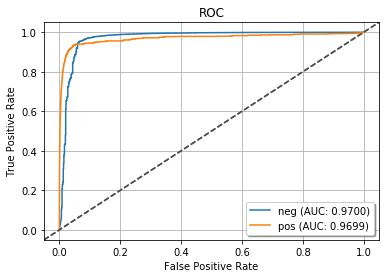

In [76]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.97

In [93]:
#for test data
cls.build_classifier(weka_train_data)

In [110]:
#result of test_data
test_evl = Evaluation(weka_test_data)
test_evl.test_model(cls, weka_test_data)
print("=== Summary of test data ===")
print(test_evl.summary())
print(test_evl.class_details())

=== Summary of test data ===

Correctly Classified Instances       15802               98.7625 %
Incorrectly Classified Instances       198                1.2375 %
Kappa statistic                          0.7232
Mean absolute error                      0.0146
Root mean squared error                  0.1031
Relative absolute error                 31.7816 %
Root relative squared error             68.1777 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.994    0.288    0.993      0.994    0.994      0.723    0.954     0.997     neg
                 0.712    0.006    0.748      0.712    0.730      0.723    0.954     0.654     pos
Weighted Avg.    0.988    0.281    0.987      0.988    0.987      0.723    0.954     0.989     



we know that the misclassfication rate for the training set is is 1.023%, the test misclassification rate is 1.2375%, which is larger than training set.

In [111]:
#confusion matrix
cm_test = pd.DataFrame(test_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm_test

,Predicted False,Predicted True
Actual False,15535.0,90.0
Actual True,108.0,267.0


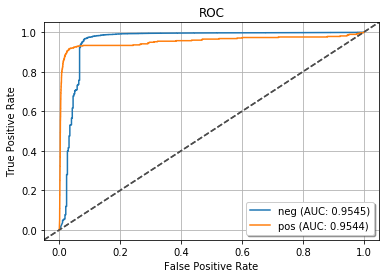

In [112]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(test_evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.9545

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [80]:
### using smote on all training data 
smote = SMOTE(random_state=0)
x, y = sm.fit_resample(X_train, y_train)
### convert the data back to dataframe 
smX_train, smy_train = pd.DataFrame(x), pd.Series(y)
smy_train.name = 'class'
### convert the data
smote_train = pd.concat([smX_train, smy_train], axis=1)
smote_train.to_csv('smote_train.csv',index=False)
 
### load the data 
smote_train_data = converters.load_any_file("smote_train.csv")
smote_train_data.class_is_last()


In [82]:
#build new cv model
smote_cls = Classifier(classname="weka.classifiers.trees.LMT")
smote_evl = Evaluation(smote_train_data)
smote_evl.crossvalidate_model(smote_cls, smote_train_data, 5, Random(1))


In [88]:
#result of CV
print("=== Summary of Cross-Validation ===")
print(smote_evl.summary())
print(smote_evl.class_details())

=== Summary of Cross-Validation ===

Correctly Classified Instances      116067               98.3619 %
Incorrectly Classified Instances      1933                1.6381 %
Kappa statistic                          0.9672
Mean absolute error                      0.0285
Root mean squared error                  0.118 
Relative absolute error                  5.7087 %
Root relative squared error             23.603  %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.980    0.013    0.987      0.980    0.984      0.967    0.995     0.996     neg
                 0.987    0.020    0.980      0.987    0.984      0.967    0.995     0.992     pos
Weighted Avg.    0.984    0.016    0.984      0.984    0.984      0.967    0.995     0.994     



In [86]:
#confusion matrix
cm = pd.DataFrame(smote_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,57808.0,1192.0
Actual True,741.0,58259.0


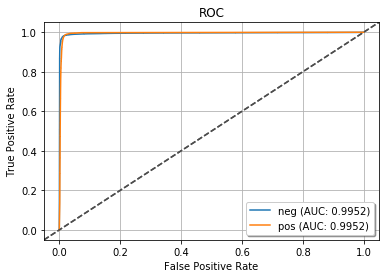

In [87]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(smote_evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.9952

Conclusion: After smote the data, the train dataset become more balance. AUC has improved, although the number of FP increse, but the TPR increse. It mean this model become more accurate when classifty positive class. 

In [101]:
#test this smote tree using test dataset
smote_cls.build_classifier(smote_train_data)

In [107]:
#result of test_data
smote_test_evl = Evaluation(weka_test_data)
smote_test_evl.test_model(smote_cls, weka_test_data)
print("=== Summary of test data after doning case-control on training data ===")
print(smote_test_evl.summary())
print(smote_test_evl.class_details())

=== Summary of test data after doning case-control on training data ===

Correctly Classified Instances       15425               96.4063 %
Incorrectly Classified Instances       575                3.5938 %
Kappa statistic                          0.5028
Mean absolute error                      0.0373
Root mean squared error                  0.1864
Relative absolute error                 81.4362 %
Root relative squared error            123.2116 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.967    0.173    0.996      0.967    0.981      0.545    0.924     0.996     neg
                 0.827    0.033    0.378      0.827    0.519      0.545    0.924     0.290     pos
Weighted Avg.    0.964    0.170    0.981      0.964    0.970      0.545    0.924     0.980     



In [108]:
#confusion matrix
cm_smote = pd.DataFrame(smote_test_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm_smote

,Predicted False,Predicted True
Actual False,15115.0,510.0
Actual True,65.0,310.0


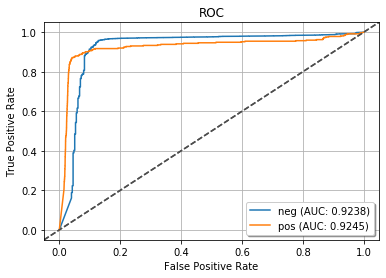

In [109]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(smote_test_evl, class_index=["0", "1"], wait=True)

     From the plot of ROC, we can know: AUC=0.9238

 we can see that AUC is not imporve on test set, proababilly because of the imblance on test data.

# 3. ISLR 6.8.3
    

    (a) As we increase s from 0, the training RSS will:
    
    answer: 
    iv. Steadily decrease. as we increase s, the penalty of β will decrese, then model will tend to become more like the OLS. so it will includes more variables. as the model flexibility increases, the training RSS will steadily decrease. 

    (b) Repeat (a) for test RSS
    
    answer: 
    ii. Decrease initially, and then eventually start increasing in a U shape. When S=0, βi will all be zero. Then the model will become constant number, it will have a high test RSS. With the increase of s, the model will then inlcudes more non-zero βi and test RSS will decrease. However, when s become larger, model will be overfit for training data. Then test RSS will increase again.

    (c) Repeat (a) for variance:
    
    answer: 
    iii. Steadily increase. As the restriction put on βi is reducing while s is increasing, the model will become more and more flexible. so the varaince will increase as well.

    (d)Repeat (a) for (squared) bias
    
    answer:
    iv. Steadily decrease. As the restriction put on βi is reducing while s is increasing, the model will become more and more flexible. Then the bias will continue decrease.

    (e) Repeat (a) for the irreducible error
    
    answer:
    v. Remain constant. irreducible error cannot be influenced by the change of model. Therefore, it will keep constant. 
    

# 4. ISLR, 6.8.5

    It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.
    Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1+y2 = 0 and x11+x21 = 0 and x12+x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: ˆ β0 = 0.

In [7]:
### 6.8.5  details write in 6.8.5 pdf file.
### I wrote 6.8.5 in 6.8.5 pdf file 
from IPython.display import IFrame
IFrame('6.8.5.PDF', width=1000, height=550)

# 5. ISLR 8.4.5

    Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75
    
    There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?
    
    
    Fisrt Way: One is the majority vote approach
    In ten resluts, 6 results classify X to read class versus 4 not red, therefore, we should classify X to red class.
    
    Second Way: classify based on the average probability. (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45 
    So the average probility is 0.45 which is smller than 0.5. Therefore, we need to classify X to green class.

# 6. ISLR 9.7.3
    Here we explore the maximal margin classifier on a toy data set.

    (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
    Obs. X1 X2 Y
     1   3  4 Red
     2   2  2 Red
     3   4  4 Red
     4   1  4 Red
     5   2  1 Blue
     6   4  3 Blue
     7   4  1 Blue

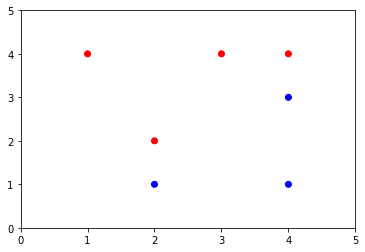

In [8]:
import matplotlib.pyplot as plt
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
color = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).
    
    the boundary is X2=X1-0.5.

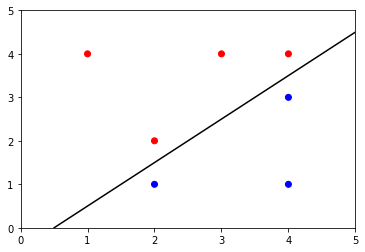

In [9]:
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 +β1X1 +β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
    
    answer:
        The classification rule is “Classify to Red if X1−X2−0.5<0, and classify to Blue otherwise.”

    (d)On your sketch, indicate the margin for the maximal margin hyperplane.

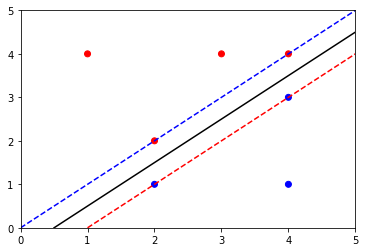

In [10]:
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.plot([0,5],[0,5], 'b--')
plt.plot([1,5],[0,4], 'r--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (e) Indicate the support vectors for the maximal margin classifier
    
    answer:
    The support vectors are the points (2,1), (2,2), (4,3) and (4,4)

    (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane
    
    answer:
        It is claer that the seventh observation is not a support vector. Therefore, moving this observation will not influence the maximal margin.

     (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane
     
     In this question, we use x2= x1-0.2 as boundary.

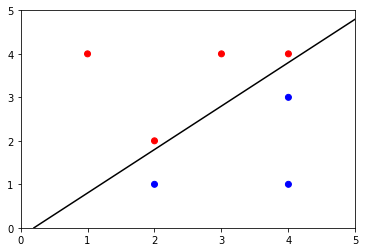

In [11]:
plt.plot([0.2, 5], [0, 4.8], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (h)Draw an additional observation on the plot so that two classes are no longer separable by a hyperplane

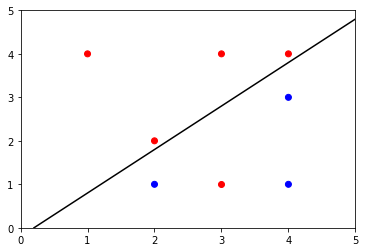

In [12]:
plt.plot([0.2, 5], [0, 4.8], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
#new point
plt.scatter([3], [1], c = ["red"])
plt.show()